# Preparation

In [1]:
# This file is based on: 1_regression_presence_of_accident
# Remove features which were found correlated with others
# Remove the categorical features which has only two categories
# Remove features identified by VIF

In [2]:
import torch
torch.cuda.empty_cache() 

In [3]:
import os 
os.environ['MPLCONFIGDIR'] = os.getcwd() + "/configs/"
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import cv2
import urllib.request
from PIL import Image

In [4]:
import pandas as pd
import pyproj

In [5]:
import os 
os.environ['MPLCONFIGDIR'] = os.getcwd() + "/configs/"
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [6]:
from pathlib import Path
import sklearn
import seaborn as sn
from scipy import stats
from tabulate import tabulate
import statsmodels.api as sm
import statsmodels.tools as tools

In [7]:
from mtp_function_yl import *

In [8]:
import sklearn
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split

from sklearn import linear_model

from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import LabelEncoder

from sklearn import svm

import seaborn as sn


# For regression
from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import PredictionErrorDisplay

import mlxtend
# For stepwise feature selection
from mlxtend.feature_selection import SequentialFeatureSelector
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

In [9]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [10]:
# For documentation and version control
# pip install watermark
%load_ext watermark

In [11]:
%watermark  -u -d -v -m --iversions

Last updated: 2024-10-25

Python implementation: CPython
Python version       : 3.11.5
IPython version      : 8.14.0

Compiler    : GCC 12.3.0
OS          : Linux
Release     : 5.15.0-119-generic
Machine     : x86_64
Processor   : x86_64
CPU cores   : 16
Architecture: 64bit

scipy      : 1.11.2
seaborn    : 0.12.2
pyproj     : 3.6.1
pandas     : 2.0.3
shapely    : 2.0.2
cv2        : 4.8.1
numpy      : 1.26.4
statsmodels: 0.14.0
torch      : 2.0.1
matplotlib : 3.7.2
mlxtend    : 0.23.1
sklearn    : 1.3.0
PIL        : 10.0.0



# Data loading

## For science cluster environment

In [12]:
aa = pd.read_csv('/home/yelhe/script/mt/dataraw/dfaa.csv')

In [13]:
acv = pd.read_csv('/home/yelhe/script/mt/model/allvariable_accident.csv')
rpv = pd.read_csv('/home/yelhe/script/mt/model/allvariable_rp.csv')

In [14]:
# same size
acv0 = acv.drop(['SV','LV','pd','svp','lvp','pdp'], axis = 1)
acv0 = acv0.assign(acp = 1)
acv0 = acv0.rename(columns = {'Nr':'id'})

In [15]:
rpv0 = rpv.drop(['speedlimit_7', 'z_qnr_34'], axis = 1)
rpv0 = rpv0.assign(acp = 0)

In [16]:
dfacrpv = pd.concat([acv0, rpv0])

In [17]:
len(dfacrpv.columns.values)

110

In [18]:
# dfacrpv.to_csv('/home/yelhe/script/mt/model/dfacrpv.csv', index = False)

## Pre Processing

In [19]:
cn = ['cp', 'ie', 'iemin', 'iemax', 'mew', 'mewmin', 'mewmax', 'meg', 
      'megmin', 'megmax', 'cmean', 'cmin', 'cmax', 'dbusl', 'dtraml', 
      'dtrainl', 'dplight', 'dstation', 'dparkcar', 'dparktw', 'dpedcro', 'dstopsign', 'dcurb',
      'dtrafficarea', 'droad', 'dvfpath', 'gvm_dwv', 'gvm_msp', 'gvm_asp', 'r_width_value',
      'speedlimit_value', 'curbtype_1', 'curbtype_2', 'z_qnr_1', 'z_qnr_2', 'z_qnr_3', 'z_qnr_4', 'z_qnr_5',
      'z_qnr_6', 'z_qnr_7', 'z_qnr_8', 'z_qnr_9', 'z_qnr_10', 'z_qnr_11', 'z_qnr_12', 'z_qnr_13',
      'z_qnr_14', 'z_qnr_15', 'z_qnr_16', 'z_qnr_17', 'z_qnr_18',
      'z_qnr_19', 'z_qnr_20', 'z_qnr_21', 'z_qnr_22', 'z_qnr_23', 'z_qnr_24',
       'z_qnr_25', 'z_qnr_26', 'z_qnr_27', 'z_qnr_28', 'z_qnr_29', 'z_qnr_30',
       'z_qnr_31', 'z_qnr_32', 'z_qnr_33', 'z_knr_1', 'z_knr_2', 'z_knr_3',
       'z_knr_4', 'z_knr_5', 'z_knr_6', 'z_knr_7', 'z_knr_8', 'z_knr_9',
       'z_knr_10', 'z_knr_11', 'z_knr_12', 'trafficarea_1', 'trafficarea_2',
       'trafficarea_3', 'r_width_1', 'r_width_2', 'r_width_3', 'r_width_4',
       'r_width_5', 'r_width_6', 'r_width_7', 'r_surface_1', 'r_surface_2',
       'speedlimit_1', 'speedlimit_2', 'speedlimit_3', 'speedlimit_4',
       'speedlimit_5', 'speedlimit_6', 'bicyclecount', 'carcount']

# Remove id, droad_sl ,'d_bicyclecount' 'd_carcount' 'curbtype'  
# 'z_qnr' 'z_knr'  'trafficarea'
# 'r_width''r_surface' 'speedlimit'

In [20]:
# remove features which has correlation <-0.8 or > 0.8

In [21]:
# correlation analysis result
dfcorr = pd.read_csv('/home/yelhe/script/mtp/tables/sorted_unique_corrpairs.csv')

In [22]:
dfcorr = dfcorr.rename(columns = {'Unnamed: 0':'feature1', 'Unnamed: 1':'feature2',
                                  '0':'correlation'})

In [23]:
dfcorr_high = dfcorr.loc[(dfcorr['correlation'] <= -0.8) | (dfcorr['correlation'] >= 0.8)]

In [24]:
dfcorr_high

,feature1,feature2,correlation
0,curbtype_2,curbtype_1,-1.000000
1,r_surface_2,r_surface_1,-1.000000
2,speedlimit_2,speedlimit_value,-0.843848
4742,mewmax,mew,0.843518
4743,megmin,meg,0.859393
4744,mewmin,mew,0.861981
4745,cmean,cp,0.906091
4746,iemax,ie,0.919919
4747,cmax,cp,0.940030
4748,iemin,ie,0.957061


In [25]:
# Above using pairwise correlation

In [26]:
# Following using VIF for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [27]:
# remove based on correlation
# speedlimit_2, 
# mewmax, mewmin, megmin, iemax, iemin, 
# cmean, cmax, gvm_ asp, gvm_msp

# remove based on data source
# dcurb (correlated to droad, and based on concept model), curbtype_1

# Only n-1 dummy variables are needed for n-category variable
# remove
# r_width_7, speedlimit_6, z_qnr_33, z_knr_12, trafficarea_3, curbtype_2, r_surface_2

# updated 
cnu = ['cp', 'ie', 'mew', 'meg', 
       'megmax', 'cmin', 'dbusl', 'dtraml','dtrainl', 'dplight', 'dstation', 
       'dparkcar', 'dparktw', 'dpedcro', 'dstopsign',
       'dtrafficarea', 'droad', 'dvfpath', 'gvm_dwv', 'bicyclecount', 'carcount',
       'r_width_value','speedlimit_value',  
       'z_qnr_1', 'z_qnr_2', 'z_qnr_3', 'z_qnr_4', 'z_qnr_5','z_qnr_6', 
       'z_qnr_7', 'z_qnr_8', 'z_qnr_9', 'z_qnr_10', 'z_qnr_11', 'z_qnr_12', 
       'z_qnr_13', 'z_qnr_14', 'z_qnr_15', 'z_qnr_16', 'z_qnr_17', 'z_qnr_18',
       'z_qnr_19', 'z_qnr_20', 'z_qnr_21', 'z_qnr_22', 'z_qnr_23', 'z_qnr_24',
       'z_qnr_25', 'z_qnr_26', 'z_qnr_27', 'z_qnr_28', 'z_qnr_29', 'z_qnr_30',
       'z_qnr_31', 'z_qnr_32', 'z_knr_1', 'z_knr_2', 'z_knr_3',
       'z_knr_4', 'z_knr_5', 'z_knr_6', 'z_knr_7', 'z_knr_8', 'z_knr_9',
       'z_knr_10', 'z_knr_11', 'trafficarea_1', 'trafficarea_2',
       'r_width_1', 'r_width_2', 'r_width_3', 'r_width_4',
       'r_width_5', 'r_width_6', 'r_surface_1', 
       'speedlimit_1', 'speedlimit_3', 'speedlimit_4',
       'speedlimit_5']

cnu1 = ['cp', 'cmean', 'cmin', 'ie', 'mew', 'meg', 
       'megmax', 'dbusl', 'dtraml','dtrainl', 'dplight', 'dstation', 
       'dparkcar', 'dparktw', 'dpedcro', 'dstopsign',
       'dtrafficarea', 'droad', 'dvfpath', 'gvm_dwv', 'bicyclecount', 'carcount',
       'r_width_value','speedlimit_value',  
       'z_qnr_1', 'z_qnr_2', 'z_qnr_3', 'z_qnr_4', 'z_qnr_5','z_qnr_6', 
       'z_qnr_7', 'z_qnr_8', 'z_qnr_9', 'z_qnr_10', 'z_qnr_11', 'z_qnr_12', 
       'z_qnr_13', 'z_qnr_14', 'z_qnr_15', 'z_qnr_16', 'z_qnr_17', 'z_qnr_18',
       'z_qnr_19', 'z_qnr_20', 'z_qnr_21', 'z_qnr_22', 'z_qnr_23', 'z_qnr_24',
       'z_qnr_25', 'z_qnr_26', 'z_qnr_27', 'z_qnr_28', 'z_qnr_29', 'z_qnr_30',
       'z_qnr_31', 'z_qnr_32', 'z_knr_1', 'z_knr_2', 'z_knr_3',
       'z_knr_4', 'z_knr_5', 'z_knr_6', 'z_knr_7', 'z_knr_8', 'z_knr_9',
       'z_knr_10', 'z_knr_11', 'trafficarea_1', 'trafficarea_2',
       'r_width_1', 'r_width_2', 'r_width_3', 'r_width_4',
       'r_width_5', 'r_width_6', 'r_surface_1', 
       'speedlimit_1', 'speedlimit_3', 'speedlimit_4',
       'speedlimit_5']
cnu2 = ['cp', 'cmin', 'ie', 'mew', 'meg', 
       'megmax', 'dbusl', 'dtraml','dtrainl', 'dplight', 'dstation', 
       'dparkcar', 'dparktw', 'dpedcro', 'dstopsign',
       'dtrafficarea', 'droad', 'dvfpath', 'gvm_dwv', 'bicyclecount', 'carcount',
       'r_width_value','speedlimit_value',  
       'z_qnr_1', 'z_qnr_2', 'z_qnr_3', 'z_qnr_4', 'z_qnr_5','z_qnr_6', 
       'z_qnr_7', 'z_qnr_8', 'z_qnr_9', 'z_qnr_10', 'z_qnr_11', 'z_qnr_12', 
       'z_qnr_13', 'z_qnr_14', 'z_qnr_15', 'z_qnr_16', 'z_qnr_17', 'z_qnr_18',
       'z_qnr_19', 'z_qnr_20', 'z_qnr_21', 'z_qnr_22', 'z_qnr_23', 'z_qnr_24',
       'z_qnr_25', 'z_qnr_26', 'z_qnr_27', 'z_qnr_28', 'z_qnr_29', 'z_qnr_30',
       'z_qnr_31', 'z_qnr_32', 'z_knr_1', 'z_knr_2', 'z_knr_3',
       'z_knr_4', 'z_knr_5', 'z_knr_6', 'z_knr_7', 'z_knr_8', 'z_knr_9',
       'z_knr_10', 'z_knr_11', 'trafficarea_1', 'trafficarea_2',
       'r_width_1', 'r_width_2', 'r_width_3', 'r_width_4',
       'r_width_5', 'r_width_6', 'r_surface_1', 
       'speedlimit_1', 'speedlimit_3', 'speedlimit_4',
       'speedlimit_5']

cnforvif = ['cmean', 'cmin', 'ie', 'mew', 'meg', 
       'megmax', 'dbusl', 'dtraml','dtrainl', 'dplight', 'dstation', 
       'dparkcar', 'dparktw', 'dpedcro', 'dstopsign',
       'dtrafficarea', 'droad', 'dvfpath', 'gvm_dwv', 'bicyclecount', 'carcount',
       'r_width_value','speedlimit_value',  
       'z_qnr_1', 'z_qnr_2', 'z_qnr_3', 'z_qnr_4', 'z_qnr_5','z_qnr_6', 
       'z_qnr_7', 'z_qnr_8', 'z_qnr_9', 'z_qnr_10', 'z_qnr_11', 'z_qnr_12', 
       'z_qnr_13', 'z_qnr_14', 'z_qnr_15', 'z_qnr_16', 'z_qnr_17', 'z_qnr_18',
       'z_qnr_19', 'z_qnr_20', 'z_qnr_21', 'z_qnr_22', 'z_qnr_23', 'z_qnr_24',
       'z_qnr_25', 'z_qnr_26', 'z_qnr_27', 'z_qnr_28', 'z_qnr_29', 'z_qnr_30',
       'z_qnr_31', 'z_qnr_32', 'z_knr_1', 'z_knr_2', 'z_knr_3',
       'z_knr_4', 'z_knr_5', 'z_knr_6', 'z_knr_7', 'z_knr_8', 'z_knr_9',
       'z_knr_10', 'z_knr_11', 'trafficarea_1', 'trafficarea_2',
       'r_width_1', 'r_width_2', 'r_width_3', 'r_width_4',
       'r_width_5', 'r_width_6', 'r_surface_1', 
       'speedlimit_1', 'speedlimit_3', 'speedlimit_4',
       'speedlimit_5']

In [28]:
print(len(cnu2), len(cnforvif))

79 79


In [29]:
# calculating VIF for each feature
X = dfacrpv[cnu2]
X = tools.add_constant(X)
dfcnu_vif = pd.DataFrame()
dfcnu_vif["feature"] = X.columns
dfcnu_vif["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

print(dfcnu_vif)
viflow = dfcnu_vif.loc[dfcnu_vif['VIF'] <= 5]
vifl = viflow['feature'].tolist()
print(vifl, len(vifl))

         feature         VIF
0          const  395.262168
1             cp    1.282290
2           cmin    1.083663
3             ie    1.200049
4            mew    1.335257
..           ...         ...
75   r_surface_1    1.392431
76  speedlimit_1    6.556548
77  speedlimit_3    8.063739
78  speedlimit_4    5.673561
79  speedlimit_5    1.803548

[80 rows x 2 columns]
['cp', 'cmin', 'ie', 'mew', 'meg', 'megmax', 'dbusl', 'dtraml', 'dtrainl', 'dplight', 'dstation', 'dparkcar', 'dparktw', 'dpedcro', 'dstopsign', 'dtrafficarea', 'droad', 'dvfpath', 'gvm_dwv', 'bicyclecount', 'carcount', 'speedlimit_value', 'z_qnr_2', 'z_qnr_3', 'z_qnr_5', 'z_qnr_7', 'z_qnr_8', 'z_qnr_9', 'z_qnr_12', 'z_qnr_13', 'z_qnr_16', 'z_qnr_17', 'z_qnr_19', 'z_qnr_20', 'z_qnr_21', 'z_qnr_22', 'z_qnr_23', 'z_qnr_24', 'z_qnr_25', 'z_qnr_26', 'z_qnr_27', 'z_qnr_28', 'z_qnr_29', 'z_qnr_30', 'z_qnr_31', 'z_qnr_32', 'trafficarea_2', 'r_width_2', 'r_surface_1', 'speedlimit_5'] 50


In [30]:
# calculating VIF for each feature
X = dfacrpv[cnforvif]
X = tools.add_constant(X)
dfcnu_vif = pd.DataFrame()
dfcnu_vif["feature"] = X.columns
dfcnu_vif["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

print(dfcnu_vif)

         feature         VIF
0          const  397.914691
1          cmean    1.412140
2           cmin    1.109314
3             ie    1.199534
4            mew    1.359740
..           ...         ...
75   r_surface_1    1.393984
76  speedlimit_1    6.560857
77  speedlimit_3    8.064407
78  speedlimit_4    5.663266
79  speedlimit_5    1.802803

[80 rows x 2 columns]


In [31]:
vifh = dfcnu_vif.loc[dfcnu_vif['VIF'] >= 5]
vifh = vifh['feature'].tolist()
print(vifh, len(vifh))

['const', 'r_width_value', 'z_qnr_1', 'z_qnr_4', 'z_qnr_6', 'z_qnr_10', 'z_qnr_11', 'z_qnr_14', 'z_qnr_15', 'z_qnr_18', 'z_knr_1', 'z_knr_2', 'z_knr_3', 'z_knr_4', 'z_knr_5', 'z_knr_6', 'z_knr_7', 'z_knr_8', 'z_knr_9', 'z_knr_10', 'z_knr_11', 'trafficarea_1', 'r_width_1', 'r_width_3', 'r_width_4', 'r_width_5', 'r_width_6', 'speedlimit_1', 'speedlimit_3', 'speedlimit_4'] 30


In [32]:
# dfcnu_vif.to_csv('/home/yelhe/script/mtp/tables/dfcnu_VIF_try.csv', index = False)

In [42]:
# calculating VIF for each feature
# Remove 'z_knr_1'
# Remove 'r_width_3'
# Remove 'z_knr_9'
# Remove 'z_knr_6'
# Remove 'speedlimit_3' 
# Remove 'z_knr_11'
# Remove 'z_qnr_18'
cntry0 = ['cmean', 'cmin', 'ie', 'mew', 'meg', 
       'megmax', 'dbusl', 'dtraml','dtrainl', 'dplight', 'dstation', 
       'dparkcar', 'dparktw', 'dpedcro', 'dstopsign',
       'dtrafficarea', 'droad', 'dvfpath', 'gvm_dwv', 'bicyclecount', 'carcount',
       'r_width_value','speedlimit_value',  
       'z_qnr_1', 'z_qnr_2', 'z_qnr_3', 'z_qnr_4', 'z_qnr_5','z_qnr_6', 
       'z_qnr_7', 'z_qnr_8', 'z_qnr_9', 'z_qnr_10', 'z_qnr_11', 'z_qnr_12', 
       'z_qnr_13', 'z_qnr_14', 'z_qnr_15', 'z_qnr_16', 'z_qnr_17',
       'z_qnr_19', 'z_qnr_20', 'z_qnr_21', 'z_qnr_22', 'z_qnr_23', 'z_qnr_24',
       'z_qnr_25', 'z_qnr_26', 'z_qnr_27', 'z_qnr_28', 'z_qnr_29', 'z_qnr_30',
       'z_qnr_31', 'z_qnr_32', 'z_knr_2', 'z_knr_3',
       'z_knr_4', 'z_knr_5', 'z_knr_7', 'z_knr_8',
       'z_knr_10', 'trafficarea_1', 'trafficarea_2',
       'r_width_1', 'r_width_2', 'r_width_4',
       'r_width_5', 'r_width_6', 'r_surface_1', 
       'speedlimit_1', 'speedlimit_4',
       'speedlimit_5']
X = dfacrpv[cntry0]
X = tools.add_constant(X)
dfcnu_vif1 = pd.DataFrame()
dfcnu_vif1["feature"] = X.columns
dfcnu_vif1["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

print(dfcnu_vif1.sort_values(by = ['VIF']))
# vifh = dfcnu_vif.loc[dfcnu_vif['VIF'] >= 5]
# vifh = vifh['feature'].tolist()
# print(vifh, len(vifh))

          feature         VIF
2            cmin    1.106005
18        dvfpath    1.131492
3              ie    1.171934
72   speedlimit_5    1.222238
10        dplight    1.223388
..            ...         ...
55        z_knr_2    3.997603
38       z_qnr_15    4.046555
56        z_knr_3    4.336828
62  trafficarea_1    4.595527
0           const  112.917253

[73 rows x 2 columns]


In [292]:
cn_vif = dfcnu_vif1['feature'].tolist()
cn_vif.remove('const')
print(cn_vif, len(cn_vif))

['cmean', 'cmin', 'ie', 'mew', 'meg', 'megmax', 'dbusl', 'dtraml', 'dtrainl', 'dplight', 'dstation', 'dparkcar', 'dparktw', 'dpedcro', 'dstopsign', 'dtrafficarea', 'droad', 'dvfpath', 'gvm_dwv', 'bicyclecount', 'carcount', 'r_width_value', 'speedlimit_value', 'z_qnr_1', 'z_qnr_2', 'z_qnr_3', 'z_qnr_4', 'z_qnr_5', 'z_qnr_6', 'z_qnr_7', 'z_qnr_8', 'z_qnr_9', 'z_qnr_10', 'z_qnr_11', 'z_qnr_12', 'z_qnr_13', 'z_qnr_14', 'z_qnr_15', 'z_qnr_16', 'z_qnr_17', 'z_qnr_19', 'z_qnr_20', 'z_qnr_21', 'z_qnr_22', 'z_qnr_23', 'z_qnr_24', 'z_qnr_25', 'z_qnr_26', 'z_qnr_27', 'z_qnr_28', 'z_qnr_29', 'z_qnr_30', 'z_qnr_31', 'z_qnr_32', 'z_knr_2', 'z_knr_3', 'z_knr_4', 'z_knr_5', 'z_knr_7', 'z_knr_8', 'z_knr_10', 'trafficarea_1', 'trafficarea_2', 'r_width_1', 'r_width_2', 'r_width_4', 'r_width_5', 'r_width_6', 'r_surface_1', 'speedlimit_1', 'speedlimit_4', 'speedlimit_5'] 72


In [293]:
cnvif = cn_vif

In [45]:
dfcnu_vif1.to_csv('/home/yelhe/script/mtp/tables/dfcnu_VIF_updated.csv', index = False)

In [46]:
y = dfacrpv['acp']
# x = dfacrpv[cnu]
x = dfacrpv[cnvif] 

In [47]:
# y.shape
x.shape
# 1087 points with 78 features in total

(1087, 72)

# Orginal regression model without feature selection

In [48]:
# Using updated features collection (84 instead of 98)

In [49]:
# Only with curb-related variables
xcp = dfacrpv[['cmean','cp', 'cmin', 'cmax']]
x_const = tools.add_constant(xcp)
# m00_c = sm.OLS(y, x_const)
# r00_c = m00_c.fit()
# r00_c.summary()

m00_log_c = sm.Logit(y,x_const, max_iter = 400)
r00_log_c = m00_log_c.fit_regularized()
r00_log_c.summary()

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.5587481503480755
            Iterations: 29
            Function evaluations: 29
            Gradient evaluations: 29


/opt/conda/lib/python3.11/site-packages/statsmodels/base/model.py:130: ValueWarning: unknown kwargs ['max_iter']
  warnings.warn(msg, ValueWarning)
/opt/conda/lib/python3.11/site-packages/statsmodels/base/model.py:130: ValueWarning: unknown kwargs ['max_iter']
  warnings.warn(msg, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    acp   No. Observations:                 1087
Model:                          Logit   Df Residuals:                     1082
Method:                           MLE   Df Model:                            4
Date:                Fri, 25 Oct 2024   Pseudo R-squ.:                 0.04428
Time:                        14:54:28   Log-Likelihood:                -607.36
converged:                       True   LL-Null:                       -635.50
Covariance Type:            nonrobust   LLR p-value:                 1.752e-11
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7572      0.246      3.072      0.002       0.274       1.240
cmean          0.0899      0.292      0.308      0.758      -0.483       0.663
cp            -3.1624      0.442     -7.159      0.000      -4.028      -2.297
cmin          -0.0884      0.074     -1.202      0.230      -0.233       0.056
cmax           1.3596      0.342      3.976      0.000       0.689       2.030
==============================================================================
"""

## OLS linear regression

### Without data splitting

In [50]:
# OLS
# With constant
x_const = tools.add_constant(x)
m00 = sm.OLS(y, x_const)
r00 = m00.fit()
r00.summary()

# m00 = sm.OLS(y, x)
# r00 = m00.fit()
# r00.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    acp   R-squared:                       0.570
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     18.70
Date:                Fri, 25 Oct 2024   Prob (F-statistic):          4.10e-140
Time:                        14:54:29   Log-Likelihood:                -202.19
No. Observations:                1087   AIC:                             550.4
Df Residuals:                    1014   BIC:                             914.7
Df Model:                          72                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0270      0.097     -0.277      0.782      -0.218       0.164
cmean                0.0119      0.011      1.102      0.271      -0.009       0.033
cmin                -0.0047      0.010     -0.487      0.626      -0.024       0.014
ie                  -0.0150      0.010     -1.511      0.131      -0.034       0.004
mew                  0.0173      0.011      1.629      0.104      -0.004       0.038
meg                 -0.0109      0.015     -0.710      0.478      -0.041       0.019
megmax               0.0063      0.014      0.438      0.662      -0.022       0.035
dbusl               -0.0155      0.012     -1.243      0.214      -0.040       0.009
dtraml               0.0072      0.013      0.559      0.576      -0.018       0.033
dtrainl              0.0084      0.012      0.725      0.469      -0.014       0.031
dplight              0.0165      0.010      1.583      0.114      -0.004       0.037
dstation             0.0087      0.012      0.716      0.474      -0.015       0.032
dparkcar            -0.0097      0.012     -0.790      0.430      -0.034       0.014
dparktw              0.0023      0.011      0.196      0.844      -0.020       0.025
dpedcro             -0.0099      0.011     -0.865      0.387      -0.032       0.013
dstopsign            0.0106      0.013      0.842      0.400      -0.014       0.035
dtrafficarea         0.0296      0.015      1.990      0.047       0.000       0.059
droad               -0.0106      0.011     -0.993      0.321      -0.032       0.010
dvfpath             -0.0147      0.010     -1.464      0.143      -0.034       0.005
gvm_dwv             -0.0082      0.012     -0.685      0.494      -0.032       0.015
bicyclecount        -0.0085      0.011     -0.755      0.450      -0.030       0.014
carcount            -0.0032      0.011     -0.293      0.770      -0.025       0.018
r_width_value       -0.0612      0.015     -4.184      0.000      -0.090      -0.032
speedlimit_value    -0.0744      0.013     -5.874      0.000      -0.099      -0.050
z_qnr_1              0.1295      0.072      1.793      0.073      -0.012       0.271
z_qnr_2              0.0575      0.113      0.511      0.609      -0.163       0.278
z_qnr_3             -0.1093      0.096     -1.133      0.258      -0.299       0.080
z_qnr_4             -0.0223      0.076     -0.294      0.769      -0.171       0.127
z_qnr_5              0.0768      0.089      0.860      0.390      -0.099       0.252
z_qnr_6             -0.0861      0.081     -1.058      0.290      -0.246       0.074
z_qnr_7              0.2638      0.102      2.581      0.010       0.063       0.464
z_qnr_8              0.1403      0.081      1.729      0.084      -0.019       0.300
z_qnr_9             -0.0083      0.090     -0.092      0.927      -0.185       0.169
z_qnr_10            -0.

In [94]:
print(r00.rsquared_adj)

0.5399593033546927


In [209]:
def printsig(r):
    df = r.pvalues
    dfo = df[df<0.05]
    dfo = dfo.to_frame()
    dfo.loc[dfo[0] >= 0.01, 'sig'] = '*'
    dfo.loc[(dfo[0] < 0.01) & (dfo[0] >= 0.001) , 'sig'] = '**'
    dfo.loc[dfo[0] < 0.001, 'sig'] = '***'
    dfo = dfo.rename_axis('feature').reset_index()
    return dfo
    print(dfo)
    print(len(dfo))

In [95]:
printsig(r00)

                             0  sig
dtrafficarea      4.688041e-02    *
r_width_value     3.113248e-05  ***
speedlimit_value  5.771990e-09  ***
z_qnr_7           9.987247e-03   **
z_qnr_10          8.077357e-08  ***
z_qnr_13          2.253944e-05  ***
z_qnr_19          4.300650e-02    *
z_qnr_22          4.629508e-03   **
z_qnr_26          7.518255e-04  ***
z_knr_4           3.676067e-07  ***
z_knr_5           2.865712e-08  ***
z_knr_8           2.844782e-02    *
trafficarea_1     7.462978e-03   **
trafficarea_2     1.186136e-05  ***
r_width_1         3.218230e-02    *
r_width_2         1.563506e-04  ***
r_surface_1       1.009068e-05  ***
speedlimit_1      2.905013e-03   **
speedlimit_4      2.135146e-90  ***


0.8923643054277829

Test accuracy : 
 0.8923643054277829

Confusion Matrix : 
 [[  0   0   0]
 [  1 763  28]
 [  0  88 207]]


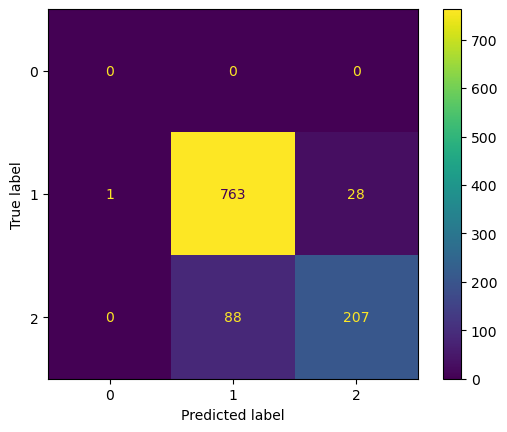

In [51]:
pred00 = r00.predict(x_const)
pred00 = list(map(round,pred00))
print(accuracy_score(y, pred00))
print('\nTest accuracy : \n', accuracy_score(y, pred00))
cm00 = confusion_matrix(y, pred00) 
print ('\nConfusion Matrix : \n', cm00)
cm00_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm00)
cm00_display.plot()

In [52]:
acc_ols = metrics.accuracy_score(y, pred00)
print('accuracy', acc_ols)

pre_ols = metrics.precision_score(y, pred00, average = None)
print('precision', pre_ols)

senrec_ols = metrics.recall_score(y, pred00, average = None)
print('sensitivity recall', senrec_ols)

f1_ols = metrics.f1_score(y, pred00, average = None)
print('f1 score', f1_ols)

pre_ols_m = np.mean(pre_ols)
senrec_ols_m = np.mean(senrec_ols)
f1_ols_m = np.mean(f1_ols)
print('mean precision', pre_ols_m)
print('mean recall', senrec_ols_m)
print('mean f1 score', f1_ols_m)

accuracy 0.8923643054277829
precision [0.         0.89659224 0.88085106]
sensitivity recall [0.         0.96338384 0.70169492]
f1 score [0.         0.9287888  0.78113208]
mean precision 0.5924811027493729
mean recall 0.5550262512126919
mean f1 score 0.5699736254818423


/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### With data splitting

In [53]:
# OLS
X_train, X_test, y_train, y_test = train_test_split(
        x_const, y,
        test_size=0.3,
        random_state=2)

m00_split = sm.OLS(y_train, X_train)
r00_split = m00_split.fit()
r00_split.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    acp   R-squared:                       0.596
Model:                            OLS   Adj. R-squared:                  0.554
Method:                 Least Squares   F-statistic:                     14.11
Date:                Fri, 25 Oct 2024   Prob (F-statistic):           2.00e-94
Time:                        14:54:31   Log-Likelihood:                -124.09
No. Observations:                 760   AIC:                             394.2
Df Residuals:                     687   BIC:                             732.4
Df Model:                          72                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0500      0.122     -0.411      0.682      -0.289       0.189
cmean                0.0279      0.013      2.162      0.031       0.003       0.053
cmin                -0.0090      0.010     -0.887      0.375      -0.029       0.011
ie                  -0.0122      0.012     -1.042      0.298      -0.035       0.011
mew                  0.0229      0.012      1.833      0.067      -0.002       0.047
meg                 -0.0029      0.018     -0.158      0.875      -0.039       0.033
megmax               0.0122      0.017      0.703      0.482      -0.022       0.046
dbusl               -0.0030      0.015     -0.201      0.841      -0.032       0.026
dtraml               0.0101      0.016      0.635      0.525      -0.021       0.041
dtrainl              0.0046      0.014      0.323      0.747      -0.023       0.032
dplight              0.0127      0.012      1.026      0.305      -0.012       0.037
dstation             0.0084      0.014      0.582      0.561      -0.020       0.037
dparkcar            -0.0132      0.015     -0.903      0.367      -0.042       0.016
dparktw              0.0159      0.014      1.146      0.252      -0.011       0.043
dpedcro             -0.0042      0.014     -0.307      0.759      -0.031       0.023
dstopsign            0.0009      0.016      0.059      0.953      -0.030       0.032
dtrafficarea         0.0487      0.018      2.710      0.007       0.013       0.084
droad                0.0008      0.013      0.057      0.954      -0.026       0.027
dvfpath             -0.0183      0.013     -1.380      0.168      -0.044       0.008
gvm_dwv             -0.0174      0.014     -1.224      0.221      -0.045       0.010
bicyclecount        -0.0186      0.013     -1.406      0.160      -0.045       0.007
carcount             0.0062      0.014      0.459      0.647      -0.020       0.033
r_width_value       -0.0467      0.018     -2.571      0.010      -0.082      -0.011
speedlimit_value    -0.0781      0.015     -5.272      0.000      -0.107      -0.049
z_qnr_1              0.1526      0.084      1.823      0.069      -0.012       0.317
z_qnr_2              0.0348      0.141      0.247      0.805      -0.242       0.312
z_qnr_3             -0.0258      0.113     -0.228      0.820      -0.248       0.197
z_qnr_4             -0.0088      0.092     -0.095      0.924      -0.190       0.173
z_qnr_5              0.0333      0.108      0.309      0.758      -0.178       0.245
z_qnr_6             -0.0426      0.099     -0.432      0.666      -0.236       0.151
z_qnr_7              0.3011      0.127      2.363      0.018       0.051       0.551
z_qnr_8              0.0722      0.102      0.708      0.479      -0.128       0.272
z_qnr_9              0.0339      0.111      0.305      0.760      -0.184       0.252
z_qnr_10            -0.

In [98]:
print(r00_split.rsquared_adj)
printsig(r00_split)

0.5542044195697948
                             0  sig
cmean             3.096565e-02    *
dtrafficarea      6.902763e-03   **
r_width_value     1.034304e-02    *
speedlimit_value  1.805402e-07  ***
z_qnr_7           1.841607e-02    *
z_qnr_10          8.308393e-08  ***
z_qnr_13          1.094280e-04  ***
z_qnr_19          2.169654e-02    *
z_qnr_21          2.041265e-02    *
z_qnr_28          4.965457e-02    *
z_qnr_29          9.865577e-04  ***
z_knr_4           3.118365e-10  ***
z_knr_5           1.613483e-08  ***
z_knr_8           2.138861e-02    *
trafficarea_1     1.059829e-02    *
trafficarea_2     1.617365e-05  ***
r_width_2         6.082594e-03   **
r_width_4         2.079804e-02    *
r_surface_1       1.062654e-04  ***
speedlimit_1      7.024117e-03   **
speedlimit_4      2.934741e-52  ***
21



Test accuracy : 
 0.8899082568807339

Confusion Matrix : 
 [[234  10]
 [ 26  57]]


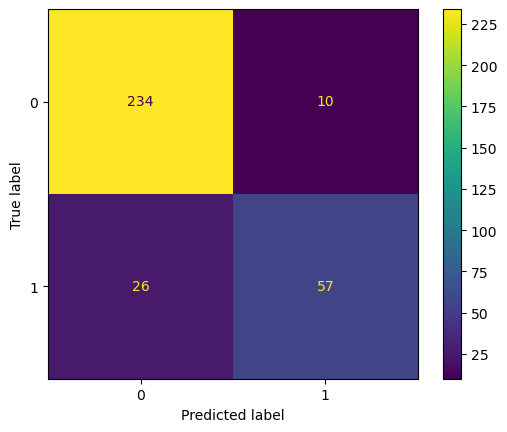

In [54]:
pred00split = r00_split.predict(X_test)
pred00split = list(map(round,pred00split))
print('\nTest accuracy : \n', accuracy_score(y_test, pred00split))
cm00split = confusion_matrix(y_test, pred00split) 
print ('\nConfusion Matrix : \n', cm00split) 
cm00split_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm00split)
cm00split_display.plot()

In [55]:
acc_ols_sp = metrics.accuracy_score(y_test, pred00split)
print('accuracy', acc_ols_sp)

pre_ols_sp = metrics.precision_score(y_test, pred00split, average = None)
print('precision', pre_ols_sp)

senrec_ols_sp = metrics.recall_score(y_test, pred00split, average = None)
print('sensitivity recall', senrec_ols_sp)

f1_ols_sp = metrics.f1_score(y_test, pred00split, average = None)
print('f1 score', f1_ols_sp)

pre_ols_sp_m = np.mean(pre_ols_sp)
senrec_ols_sp_m = np.mean(senrec_ols_sp)
f1_ols_sp_m = np.mean(f1_ols_sp)
print('mean precision', pre_ols_sp_m)
print('mean recall', senrec_ols_sp_m)
print('mean f1 score', f1_ols_sp_m)

accuracy 0.8899082568807339
precision [0.9        0.85074627]
sensitivity recall [0.95901639 0.68674699]
f1 score [0.92857143 0.76      ]
mean precision 0.8753731343283582
mean recall 0.8228816906972151
mean f1 score 0.8442857142857142


## Logistic regression

### Without data splitting

In [56]:

# Without constant
# m00_log = sm.Logit(y, x)
# r00_log = m00_log.fit_regularized()
# r00_log.summary()

# Add constant
x_const = tools.add_constant(x)
m00_log = sm.Logit(y,x_const, max_iter = 400)
r00_log = m00_log.fit_regularized()
# r00_log = m00_log.fit()

r00_log.summary()

/opt/conda/lib/python3.11/site-packages/statsmodels/base/model.py:130: ValueWarning: unknown kwargs ['max_iter']
  warnings.warn(msg, ValueWarning)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.2363027910563202
            Iterations: 420
            Function evaluations: 420
            Gradient evaluations: 420


/opt/conda/lib/python3.11/site-packages/statsmodels/base/model.py:130: ValueWarning: unknown kwargs ['max_iter']
  warnings.warn(msg, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    acp   No. Observations:                 1087
Model:                          Logit   Df Residuals:                     1014
Method:                           MLE   Df Model:                           72
Date:                Fri, 25 Oct 2024   Pseudo R-squ.:                  0.5958
Time:                        14:54:35   Log-Likelihood:                -256.86
converged:                       True   LL-Null:                       -635.50
Covariance Type:            nonrobust   LLR p-value:                6.688e-115
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -25.3013   8718.106     -0.003      0.998   -1.71e+04    1.71e+04
cmean                0.0813      0.144      0.565      0.572      -0.201       0.364
cmin                 0.0191      0.162      0.118      0.906      -0.299       0.337
ie                  -0.0898      0.124     -0.722      0.470      -0.333       0.154
mew                  0.2351      0.134      1.757      0.079      -0.027       0.497
meg                 -0.0537      0.202     -0.265      0.791      -0.450       0.343
megmax               0.0474      0.184      0.258      0.797      -0.313       0.408
dbusl               -0.2804      0.178     -1.578      0.114      -0.629       0.068
dtraml               0.0983      0.179      0.549      0.583      -0.253       0.449
dtrainl              0.2005      0.151      1.326      0.185      -0.096       0.497
dplight              0.1071      0.132      0.810      0.418      -0.152       0.366
dstation             0.1222      0.174      0.703      0.482      -0.218       0.463
dparkcar            -0.1003      0.154     -0.650      0.516      -0.403       0.202
dparktw              0.0527      0.155      0.341      0.733      -0.250       0.356
dpedcro             -0.1074      0.146     -0.734      0.463      -0.394       0.179
dstopsign            0.1488      0.163      0.914      0.361      -0.170       0.468
dtrafficarea         0.3305      0.179      1.848      0.065      -0.020       0.681
droad               -0.1866      0.150     -1.246      0.213      -0.480       0.107
dvfpath             -0.1213      0.137     -0.885      0.376      -0.390       0.147
gvm_dwv             -0.1538      0.146     -1.052      0.293      -0.440       0.133
bicyclecount        -0.1055      0.145     -0.730      0.466      -0.389       0.178
carcount            -0.0785      0.143     -0.547      0.584      -0.359       0.202
r_width_value       -0.6508      0.183     -3.547      0.000      -1.010      -0.291
speedlimit_value    -1.5077      0.263     -5.732      0.000      -2.023      -0.992
z_qnr_1              1.6105      0.761      2.117      0.034       0.119       3.102
z_qnr_2              0.6204      1.225      0.506      0.613      -1.780       3.021
z_qnr_3             -0.7277      1.145     -0.635      0.525      -2.973       1.517
z_qnr_4              0.1495      1.102      0.136      0.892      -2.010       2.309
z_qnr_5              1.1994      1.105      1.086      0.278      -0.965       3.364
z_qnr_6             -0.3152      1.096     -0.288      0.774      -2.463       1.832
z_qnr_7              2.7294      1.095      2.493      0.013       0.584       4.875
z_qnr_8              2.1316      0.903      2.361      0.018       0.362       3.901
z_qnr_9              0.4163      1.266      0.329      0.742      -2.066       2.898
z_qnr_10            -2.8480      0.848     -3.359      0.001      -4.510      -1.186
z_qnr_11             0.2581      0.801      0.322      0.747      -1.313       1.829
z_qnr_12   

In [99]:
print(r00_log.prsquared)
printsig(r00_log)

0.5958118508012809
                             0  sig
r_width_value     3.899697e-04  ***
speedlimit_value  9.945366e-09  ***
z_qnr_1           3.429263e-02    *
z_qnr_7           1.265846e-02    *
z_qnr_8           1.821039e-02    *
z_qnr_10          7.814372e-04  ***
z_qnr_13          4.330059e-02    *
z_qnr_16          8.660481e-03   **
z_qnr_17          1.835723e-02    *
z_qnr_19          1.045426e-02    *
z_qnr_21          6.268664e-04  ***
z_qnr_22          9.033634e-03   **
z_qnr_26          1.989756e-02    *
z_knr_4           1.258243e-06  ***
z_knr_5           6.782204e-05  ***
z_knr_8           7.005655e-04  ***
trafficarea_2     6.083004e-04  ***
r_width_2         1.735471e-03   **
r_width_5         4.546395e-02    *
speedlimit_1      1.111849e-05  ***
speedlimit_4      8.718404e-27  ***
speedlimit_5      3.365471e-02    *
22


0.9052437902483901

Test accuracy : 
 0.9052437902483901

Confusion Matrix : 
 [[755  37]
 [ 66 229]]
accuracy 0.9052437902483901
precision [0.91961023 0.86090226]
sensitivity recall [0.95328283 0.77627119]
f1 score [0.93614383 0.81639929]
mean precision 0.8902562435320945
mean recall 0.8647770073617531
mean f1 score 0.87627155917882


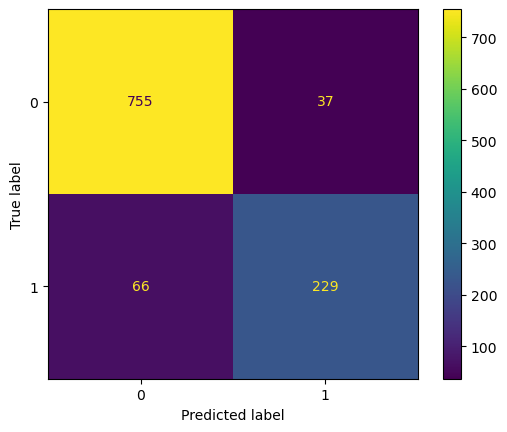

In [57]:
pred00log = r00_log.predict(x_const)
pred00log = list(map(round,pred00log))
print(accuracy_score(y, pred00log))
print('\nTest accuracy : \n', accuracy_score(y, pred00log))
cm00log = confusion_matrix(y, pred00log) 
print ('\nConfusion Matrix : \n', cm00log)
cm00log_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm00log)
cm00log_display.plot()

acc_log = metrics.accuracy_score(y, pred00log)
print('accuracy', acc_log)

pre_log = metrics.precision_score(y, pred00log, average = None)
print('precision', pre_log)

senrec_log = metrics.recall_score(y, pred00log, average = None)
print('sensitivity recall', senrec_log)

f1_log = metrics.f1_score(y, pred00log, average = None)
print('f1 score', f1_log)

pre_log_m = np.mean(pre_log)
senrec_log_m = np.mean(senrec_log)
f1_log_m = np.mean(f1_log)
print('mean precision', pre_log_m)
print('mean recall', senrec_log_m)
print('mean f1 score', f1_log_m)

### With data splitting

In [58]:

X_train1, X_test1, y_train1, y_test1 = train_test_split(
        x_const, y,
        test_size=0.3,
        random_state=6)
m00_log_split = sm.Logit(y_train1,X_train1, max_iter = 400)
r00_log_split = m00_log_split.fit_regularized()
r00_log_split.summary()

/opt/conda/lib/python3.11/site-packages/statsmodels/base/model.py:130: ValueWarning: unknown kwargs ['max_iter']
  warnings.warn(msg, ValueWarning)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.22770022587767622
            Iterations: 444
            Function evaluations: 444
            Gradient evaluations: 444


/opt/conda/lib/python3.11/site-packages/statsmodels/base/model.py:130: ValueWarning: unknown kwargs ['max_iter']
  warnings.warn(msg, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    acp   No. Observations:                  760
Model:                          Logit   Df Residuals:                      687
Method:                           MLE   Df Model:                           72
Date:                Fri, 25 Oct 2024   Pseudo R-squ.:                  0.6049
Time:                        14:54:37   Log-Likelihood:                -173.05
converged:                       True   LL-Null:                       -438.01
Covariance Type:            nonrobust   LLR p-value:                 6.123e-71
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -30.4916   1.25e+05     -0.000      1.000   -2.46e+05    2.46e+05
cmean                0.1299      0.179      0.726      0.468      -0.220       0.480
cmin                 0.1110      0.172      0.647      0.518      -0.225       0.448
ie                  -0.0783      0.164     -0.477      0.633      -0.400       0.243
mew                  0.1140      0.176      0.648      0.517      -0.231       0.459
meg                 -0.0152      0.239     -0.064      0.949      -0.484       0.453
megmax               0.0802      0.233      0.345      0.730      -0.376       0.536
dbusl               -0.2326      0.217     -1.074      0.283      -0.657       0.192
dtraml               0.3991      0.234      1.702      0.089      -0.061       0.859
dtrainl              0.1026      0.184      0.558      0.577      -0.258       0.463
dplight              0.0881      0.164      0.538      0.591      -0.233       0.409
dstation             0.1183      0.218      0.544      0.587      -0.308       0.545
dparkcar            -0.0679      0.191     -0.356      0.722      -0.441       0.306
dparktw             -0.0012      0.192     -0.006      0.995      -0.378       0.376
dpedcro             -0.1578      0.174     -0.906      0.365      -0.499       0.184
dstopsign            0.1981      0.204      0.969      0.333      -0.203       0.599
dtrafficarea         0.4430      0.231      1.920      0.055      -0.009       0.895
droad               -0.1482      0.188     -0.789      0.430      -0.516       0.220
dvfpath             -0.3731      0.194     -1.921      0.055      -0.754       0.008
gvm_dwv             -0.3539      0.189     -1.873      0.061      -0.724       0.016
bicyclecount        -0.1462      0.176     -0.829      0.407      -0.492       0.199
carcount            -0.1154      0.176     -0.656      0.512      -0.460       0.229
r_width_value       -0.5333      0.226     -2.358      0.018      -0.977      -0.090
speedlimit_value    -1.5605      0.340     -4.590      0.000      -2.227      -0.894
z_qnr_1              1.2822      1.030      1.245      0.213      -0.737       3.301
z_qnr_2              0.2358      1.525      0.155      0.877      -2.753       3.225
z_qnr_3             -1.4500      1.366     -1.061      0.289      -4.128       1.228
z_qnr_4             -0.7630      1.669     -0.457      0.647      -4.033       2.507
z_qnr_5              0.8531      1.312      0.650      0.515      -1.718       3.424
z_qnr_6             -0.9289      1.270     -0.731      0.465      -3.419       1.561
z_qnr_7              2.4992      1.360      1.838      0.066      -0.166       5.164
z_qnr_8              1.5403      1.205      1.278      0.201      -0.822       3.903
z_qnr_9             -0.2857      1.494     -0.191      0.848      -3.214       2.643
z_qnr_10            -2.9555      1.047     -2.822      0.005      -5.009      -0.902
z_qnr_11            -0.5851      0.972     -0.602      0.547      -2.491       1.321
z_qnr_12   

In [100]:
print(r00_log_split.prsquared)
printsig(r00_log_split)

0.6049162891624101
                             0  sig
r_width_value     1.836559e-02    *
speedlimit_value  4.442721e-06  ***
z_qnr_10          4.779238e-03   **
z_qnr_13          4.583431e-02    *
z_qnr_16          1.305665e-02    *
z_qnr_17          4.347246e-02    *
z_qnr_21          1.332527e-03   **
z_qnr_22          7.492775e-03   **
z_knr_4           5.183962e-06  ***
z_knr_5           9.078991e-04  ***
z_knr_8           4.640612e-03   **
trafficarea_2     1.465614e-02    *
r_width_2         4.662701e-03   **
speedlimit_1      6.872641e-04  ***
speedlimit_4      6.858414e-18  ***
15


0.9051987767584098

Test accuracy : 
 0.9051987767584098

Confusion Matrix : 
 [[220  12]
 [ 19  76]]
accuracy 0.9051987767584098
precision [0.92050209 0.86363636]
sensitivity recall [0.94827586 0.8       ]
f1 score [0.93418259 0.83060109]
mean precision 0.8920692278432865
mean recall 0.8741379310344828
mean f1 score 0.8823918415648603


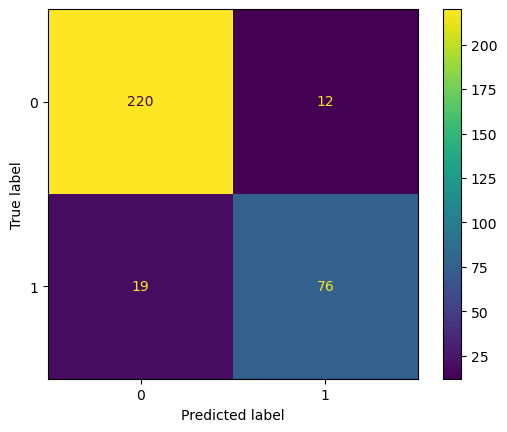

In [59]:
pred00log_split = r00_log.predict(X_test1)
pred00log_split = list(map(round,pred00log_split))
print(accuracy_score(y_test1, pred00log_split))
print('\nTest accuracy : \n', accuracy_score(y_test1, pred00log_split))
cm00log_split = confusion_matrix(y_test1, pred00log_split) 
print ('\nConfusion Matrix : \n', cm00log_split)
cm00log_split_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm00log_split)
cm00log_split_display.plot()

acc_log_split = metrics.accuracy_score(y_test1, pred00log_split)
print('accuracy', acc_log_split)

pre_log_split = metrics.precision_score(y_test1, pred00log_split, average = None)
print('precision', pre_log_split)

senrec_log_split = metrics.recall_score(y_test1, pred00log_split, average = None)
print('sensitivity recall', senrec_log_split)

f1_log_split = metrics.f1_score(y_test1, pred00log_split, average = None)
print('f1 score', f1_log_split)

pre_log_split_m = np.mean(pre_log_split)
senrec_log_split_m = np.mean(senrec_log_split)
f1_log_split_m = np.mean(f1_log_split)
print('mean precision', pre_log_split_m)
print('mean recall', senrec_log_split_m)
print('mean f1 score', f1_log_split_m)

# Step wise feature selection

In [3]:
# Check sklearn metrics name for feature selection
# sklearn.metrics.get_scorer_names()

## Ordinary Least Squares Regression model

### Sequential forward floating selection

In [51]:
# # n = best, linear regression, scoring = neg_mean_squared_error, cv = 5
sffslin0 = featureselection_lin(True, 'neg_mean_squared_error', 5, x, y) 
print(sffslin0.k_feature_names_)
print(len(sffslin0.k_feature_names_))
print(sffslin0.k_score_)



STOPPING EARLY DUE TO KEYBOARD INTERRUPT...

None


TypeError: object of type 'NoneType' has no len()

In [ ]:
# # n = best, linear regression, scoring = neg_mean_squared_error, cv = 10
sffslin1 = featureselection_lin(True, 'neg_mean_squared_error', 10, x, y) 
print(sffslin1.k_feature_names_)
print(len(sffslin1.k_feature_names_))
print(sffslin1.k_score_)


In [114]:
# # # n = best, linear regression, scoring = neg_mean_squared_error, cv = 15
# print(selected_features6.k_feature_names_)
# print(len(selected_features6.k_feature_names_))
# print(selected_features6.k_score_)
# # 34

In [115]:
# # # n = best, linear regression, scoring = neg_mean_squared_error, cv = 20
# print(selected_features7.k_feature_names_)
# print(len(selected_features7.k_feature_names_))
# print(selected_features7.k_score_)
# 37

In [117]:
# # n = best, linear regression, scoring = r2, cv = 5
sffslin2 = featureselection_lin(True, 'r2', 5, x, y) 
print(sffslin2.k_feature_names_)
print(len(sffslin2.k_feature_names_))
print(sffslin2.k_score_)

('ie', 'mew', 'cmin', 'dstopsign', 'dvfpath', 'r_width_value', 'speedlimit_value', 'z_qnr_3', 'z_qnr_10', 'z_qnr_11', 'z_qnr_13', 'z_qnr_14', 'z_qnr_23', 'z_knr_5', 'z_knr_6', 'z_knr_7', 'z_knr_9', 'r_width_1', 'r_width_3', 'r_width_4', 'r_width_5', 'r_width_6', 'r_surface_1', 'speedlimit_1', 'speedlimit_4')
25
0.09083514182795516


In [131]:
# n = best, linear regression, scoring = r2, cv = 10
sffslin3 = featureselection_lin(True, 'r2', 10, x, y) 
print(sffslin3.k_feature_names_)
print(len(sffslin3.k_feature_names_))
print(sffslin3.k_score_)

('cp', 'ie', 'mew', 'megmax', 'dparktw', 'dpedcro', 'dstopsign', 'droad', 'r_width_value', 'speedlimit_value', 'z_qnr_2', 'z_qnr_3', 'z_qnr_4', 'z_qnr_6', 'z_qnr_9', 'z_qnr_10', 'z_qnr_12', 'z_qnr_13', 'z_qnr_14', 'z_qnr_15', 'z_qnr_16', 'z_qnr_18', 'z_qnr_23', 'z_qnr_25', 'z_qnr_27', 'z_qnr_30', 'z_qnr_31', 'z_qnr_32', 'z_knr_1', 'z_knr_2', 'z_knr_6', 'z_knr_7', 'z_knr_8', 'z_knr_11', 'r_width_1', 'r_width_3', 'r_width_4', 'r_width_5', 'r_width_6', 'r_surface_1', 'speedlimit_1', 'speedlimit_4', 'speedlimit_5')
43
-0.003116770937851121


In [118]:
# # # n = best, linear regression, scoring = r2, cv = 15
# print(selected_features9.k_feature_names_)
# print(len(selected_features9.k_feature_names_))
# print(selected_features9.k_score_)
# # 59

In [119]:
# # # n = best, linear regression, scoring = r2, cv = 20
# print(selected_features10.k_feature_names_)
# print(len(selected_features10.k_feature_names_))
# print(selected_features10.k_score_)
# # 73

In [120]:
# # # n = best, linear regression, scoring = neg median absolute error, cv = 5
sffslin4 = featureselection_lin(True, 'neg_median_absolute_error', 5, x, y) 
print(sffslin4.k_feature_names_)
print(len(sffslin4.k_feature_names_))
print(sffslin4.k_score_)

('z_qnr_7', 'trafficarea_2', 'r_width_4', 'speedlimit_1', 'speedlimit_4')
5
-0.18490933143765312


In [133]:
# # # n = best, linear regression, scoring = neg median absolute error, cv = 10
sffslin5 = featureselection_lin(True, 'neg_median_absolute_error', 10, x, y) 
print(sffslin5.k_feature_names_)
print(len(sffslin5.k_feature_names_))
print(sffslin5.k_score_)

('r_width_value', 'speedlimit_value', 'z_qnr_20', 'z_qnr_22', 'z_qnr_26', 'trafficarea_2', 'r_width_3', 'r_width_4', 'r_width_5', 'r_width_6', 'r_surface_1', 'speedlimit_4')
12
-0.13157577362107836


In [121]:
# # # n = best, linear regression, scoring = neg median absolute error, cv = 15
# print(selected_features12.k_feature_names_)
# print(len(selected_features12.k_feature_names_))
# print(selected_features12.k_score_)
# 21

In [122]:
# # n = best, linear regression, scoring = neg median absolute error, cv = 20
# print(selected_features13.k_feature_names_)
# print(len(selected_features13.k_feature_names_))
# print(selected_features13.k_score_)
# # 11

In [125]:
# # # n = best, linear regression, scoring = neg mean absolute error, cv = 5
sffslin6 = featureselection_lin(True, 'neg_mean_absolute_error', 5, x, y) 
print(sffslin6.k_feature_names_)
print(len(sffslin6.k_feature_names_))
print(sffslin6.k_score_)

('dtrafficarea', 'z_qnr_10', 'trafficarea_2', 'r_width_4', 'r_width_5', 'r_surface_1', 'speedlimit_1', 'speedlimit_3', 'speedlimit_4', 'speedlimit_5')
10
-0.28187575192075237


In [124]:
# # # n = best, linear regression, scoring = neg mean absolute error, cv = 10
sffslin7 = featureselection_lin(True, 'neg_mean_absolute_error', 10, x, y) 
print(sffslin7.k_feature_names_)
print(len(sffslin7.k_feature_names_))
print(sffslin7.k_score_)

('dplight', 'r_width_value', 'speedlimit_value', 'z_qnr_23', 'z_qnr_26', 'z_knr_4', 'z_knr_9', 'trafficarea_2', 'r_width_3', 'r_width_4', 'r_width_5', 'r_width_6', 'r_surface_1', 'speedlimit_4')
14
-0.2420524177831998


In [126]:
# # n = best, linear regression, scoring = neg mean absolute error, cv = 15
# print(selected_features15.k_feature_names_)
# print(len(selected_features15.k_feature_names_))
# print(selected_features15.k_score_)
# # 24

In [127]:
# # # n = best, linear regression, scoring = neg mean absolute error, cv = 20
# print(selected_features16.k_feature_names_)
# print(len(selected_features16.k_feature_names_))
# print(selected_features16.k_score_)
# # 22

In [135]:
selected_columns_linr_sffs = []
selected_columns_linr_sffs = {'nmse_cv5':list(sffslin0.k_feature_names_), 
                              'nmse_cv10':list(sffslin1.k_feature_names_), 
                              'r2_cv5':list(sffslin2.k_feature_names_), 
                              'r2_cv10':list(sffslin3.k_feature_names_), 
                              'nmedae_cv5':list(sffslin4.k_feature_names_), 
                              'nmedae_cv10':list(sffslin5.k_feature_names_), 
                              'nmeae_cv5':list(sffslin6.k_feature_names_), 
                              'nmeae_cv10':list(sffslin7.k_feature_names_)}

In [136]:
df_sf_linr_sffs = pd.DataFrame(dict([(k,pd.Series(v)) for k,v in selected_columns_linr_sffs.items()]))

In [137]:
df_sf_linr_sffs.to_csv('/home/yelhe/script/mtp/tables/updated_sffs_linearreg.csv', index = True)

In [152]:
# selected_columns = list(sffslin.k_feature_names_)


In [257]:
# # OLS
# df_selected = dfacrpv[selected_columns]

# m0 = sm.OLS(y, df_selected)
# r0 = m0.fit()
# r0.summary()

### Sequential backward floating selection

In [154]:
# # n = best, linear regression, backward, scoring = neg_mean_squared_error, cv = 5
sbfslin0 = featureselection_lin(False, 'neg_mean_squared_error', 5, x, y) 
print(sbfslin0.k_feature_names_)
print(len(sbfslin0.k_feature_names_))
print(sbfslin0.k_score_)

('dtrafficarea', 'droad', 'z_qnr_10', 'z_qnr_30', 'z_qnr_31', 'z_knr_8', 'trafficarea_2', 'r_width_4', 'r_width_5', 'r_width_6', 'r_surface_1', 'speedlimit_3', 'speedlimit_4', 'speedlimit_5')
14
-0.1468143631396745


In [155]:
# # n = best, linear regression, backward, scoring = neg_mean_squared_error, cv = 10
sbfslin1 = featureselection_lin(False, 'neg_mean_squared_error', 10, x, y) 
print(sbfslin1.k_feature_names_)
print(len(sbfslin1.k_feature_names_))
print(sbfslin1.k_score_)


('ie', 'dvfpath', 'r_width_value', 'speedlimit_value', 'z_qnr_10', 'z_qnr_23', 'z_qnr_25', 'z_qnr_26', 'z_knr_4', 'z_knr_9', 'trafficarea_2', 'r_width_1', 'r_width_2', 'r_width_3', 'r_width_4', 'r_width_5', 'r_width_6', 'r_surface_1', 'speedlimit_3', 'speedlimit_4')
20
-0.12100686105804259


In [156]:
# # n = best, linear regression, backward, scoring = neg_mean_squared_error, cv = 15
# print(sbfs2.k_feature_names_)
# print(len(sbfs2.k_feature_names_))
# print(sbfs2.k_score_)
# # 26

In [157]:
# # n = best, linear regression, backward, scoring = neg_mean_squared_error, cv = 20
# print(sbfs3.k_feature_names_)
# print(len(sbfs3.k_feature_names_))
# print(sbfs3.k_score_)
# # 52

In [158]:
# # n = best, linear regression, backward, scoring = r2, cv = 5
sbfslin2 = featureselection_lin(False, 'r2', 5, x, y) 
print(sbfslin2.k_feature_names_)
print(len(sbfslin2.k_feature_names_))
print(sbfslin2.k_score_)

('ie', 'mew', 'cmin', 'dstopsign', 'dvfpath', 'r_width_value', 'speedlimit_value', 'z_qnr_3', 'z_qnr_10', 'z_qnr_11', 'z_qnr_13', 'z_qnr_14', 'z_qnr_23', 'z_knr_5', 'z_knr_6', 'z_knr_7', 'z_knr_9', 'r_width_1', 'r_width_3', 'r_width_4', 'r_width_5', 'r_width_6', 'r_surface_1', 'speedlimit_1', 'speedlimit_4')
25
0.09083514182795516


In [159]:
# # n = best, linear regression, backward, scoring = r2, cv = 10
sbfslin3 = featureselection_lin(False, 'r2', 10, x, y) 
print(sbfslin3.k_feature_names_)
print(len(sbfslin3.k_feature_names_))
print(sbfslin3.k_score_)

('ie', 'mew', 'cmin', 'dstopsign', 'dvfpath', 'r_width_value', 'speedlimit_value', 'z_qnr_2', 'z_qnr_3', 'z_qnr_4', 'z_qnr_6', 'z_qnr_9', 'z_qnr_10', 'z_qnr_13', 'z_qnr_14', 'z_qnr_15', 'z_qnr_16', 'z_qnr_18', 'z_qnr_25', 'z_qnr_26', 'z_qnr_30', 'z_qnr_31', 'z_qnr_32', 'z_knr_1', 'z_knr_2', 'z_knr_5', 'z_knr_6', 'z_knr_7', 'z_knr_8', 'trafficarea_1', 'trafficarea_2', 'r_width_1', 'r_width_2', 'r_width_3', 'r_width_4', 'r_width_5', 'r_width_6', 'r_surface_1', 'speedlimit_3', 'speedlimit_4', 'speedlimit_5')
41
-0.0037091494395070645


In [162]:
# # n = best, linear regression, backward, scoring = r2, cv = 15


In [163]:
# # n = best, linear regression, backward, scoring = r2, cv = 20


In [165]:
# # n = best, linear regression, backward, scoring = neg median aboslute error, cv = 5
sbfslin4 = featureselection_lin(False, 'neg_median_absolute_error', 5, x, y) 
print(sbfslin4.k_feature_names_)
print(len(sbfslin4.k_feature_names_))
print(sbfslin4.k_score_)

('z_qnr_7', 'z_qnr_8', 'z_qnr_12', 'z_qnr_16', 'z_qnr_22', 'z_qnr_27', 'z_knr_4', 'z_knr_5', 'z_knr_9', 'trafficarea_2', 'r_width_4', 'r_width_6', 'speedlimit_4')
13
-0.1534518932857683


In [166]:
# # n = best, linear regression, backward, scoring = neg median aboslute error, cv = 10
sbfslin5 = featureselection_lin(False, 'neg_median_absolute_error', 10, x, y) 
print(sbfslin5.k_feature_names_)
print(len(sbfslin5.k_feature_names_))
print(sbfslin5.k_score_)

('r_width_value', 'speedlimit_value', 'z_qnr_20', 'z_qnr_22', 'z_qnr_26', 'trafficarea_2', 'r_width_3', 'r_width_4', 'r_width_5', 'r_width_6', 'r_surface_1', 'speedlimit_4')
12
-0.13157577362107836


In [252]:
# # n = best, linear regression, backward, scoring = neg median aboslute error, cv = 15


('z_qnr_1', 'z_qnr_5', 'z_qnr_7', 'z_qnr_16', 'z_qnr_20', 'z_qnr_26', 'z_qnr_28', 'z_qnr_29', 'z_knr_9', 'trafficarea_3', 'r_width_4', 'speedlimit_2', 'speedlimit_4', 'speedlimit_6')
14
-0.14787659233510794


In [254]:
# # n = best, linear regression, backward, scoring = neg median aboslute error, cv = 20


('z_knr_12', 'trafficarea_1', 'trafficarea_2', 'trafficarea_3', 'r_width_4', 'r_width_6', 'speedlimit_2', 'speedlimit_4', 'speedlimit_6')
9
-0.12273976660347483


In [167]:
# # n = best, linear regression, backward, scoring = neg mean absolute error, cv = 5
sbfslin6 = featureselection_lin(False, 'neg_mean_absolute_error', 5, x, y) 
print(sbfslin6.k_feature_names_)
print(len(sbfslin6.k_feature_names_))
print(sbfslin6.k_score_)

('dtrafficarea', 'z_qnr_10', 'trafficarea_2', 'r_width_4', 'r_width_5', 'r_surface_1', 'speedlimit_1', 'speedlimit_3', 'speedlimit_4', 'speedlimit_5')
10
-0.28187575192075237


In [168]:
# # n = best, linear regression, backward, scoring = neg mean aboslute error, cv = 10
sbfslin7 = featureselection_lin(False, 'neg_mean_absolute_error', 10, x, y) 
print(sbfslin7.k_feature_names_)
print(len(sbfslin7.k_feature_names_))
print(sbfslin7.k_score_)

('dplight', 'r_width_value', 'speedlimit_value', 'z_qnr_23', 'z_qnr_26', 'z_knr_4', 'z_knr_9', 'trafficarea_2', 'r_width_3', 'r_width_4', 'r_width_5', 'r_width_6', 'r_surface_1', 'speedlimit_4')
14
-0.2420524177831998


In [169]:
# # n = best, linear regression, backward, scoring = neg mean aboslute error, cv = 15


In [170]:
# n = best, linear regression, backward, scoring = neg mean aboslute error, cv = 20


In [171]:
selected_columns_linr_sbfs = []
selected_columns_linr_sbfs = {'all': cnu,
                              'nmse_cv5':list(sbfslin0.k_feature_names_), 
                              'nmse_cv10':list(sbfslin1.k_feature_names_), 
                              'r2_cv5':list(sbfslin2.k_feature_names_), 
                              'r2_cv10':list(sbfslin3.k_feature_names_), 
                              'nmedae_cv5':list(sbfslin4.k_feature_names_), 
                              'nmedae_cv10':list(sbfslin5.k_feature_names_),
                              'nmeae_cv5':list(sbfslin6.k_feature_names_), 
                              'nmeae_cv10':list(sbfslin7.k_feature_names_)}

In [172]:
df_sf_linr_sbfs = pd.DataFrame(dict([(k,pd.Series(v)) for k,v in selected_columns_linr_sbfs.items()]))

In [173]:
df_sf_linr_sbfs.to_csv('/home/yelhe/script/mtp/tables/updated_sbfs_linearreg.csv', index = True)

In [188]:
sbfs_columns = list(sbfslin7.k_feature_names_)

In [100]:
# df_output = pd.read_csv('/home/yelhe/script/mtp/tables/updated_sbfs_linearreg.csv')

In [101]:
# df_output.columns

Index(['Unnamed: 0', 'all', 'nmse_cv5', 'nmse_cv10', 'r2_cv5', 'r2_cv10',
       'nmedae_cv5', 'nmedae_cv10', 'nmeae_cv5', 'nmeae_cv10'],
      dtype='object')

In [102]:
# prsq_lin_sffs = []
# prsq_lin_sbfs = []

In [131]:


# ## For sffs
# l = list(df_output['nmeae_cv10'].dropna())

# # x_selected
# xs = dfacrpv[l]

In [132]:
# # OLS
# xs_const = tools.add_constant(xs) 
# # X_train, X_test, y_train, y_test = train_test_split(
# #         df_selected, y,
# #         test_size=0.3,
# #         random_state=0)

# m1 = sm.OLS(y, xs_const)
# r1 = m1.fit()
# r1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    acp   R-squared:                       0.510
Model:                            OLS   Adj. R-squared:                  0.503
Method:                 Least Squares   F-statistic:                     79.61
Date:                Fri, 04 Oct 2024   Prob (F-statistic):          7.28e-155
Time:                        18:37:30   Log-Likelihood:                -274.08
No. Observations:                1087   AIC:                             578.2
Df Residuals:                    1072   BIC:                             653.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.3365      0.070     -4.815      0.000      -0.474      -0.199
dplight              0.0138      0.010      1.390      0.165      -0.006       0.033
r_width_value       -0.0917      0.019     -4.732      0.000      -0.130      -0.054
speedlimit_value    -0.0821      0.011     -7.253      0.000      -0.104      -0.060
z_qnr_23            -0.2385      0.070     -3.388      0.001      -0.377      -0.100
z_qnr_26            -0.2785      0.098     -2.841      0.005      -0.471      -0.086
z_knr_4              0.2378      0.034      6.982      0.000       0.171       0.305
z_knr_9              0.2139      0.033      6.388      0.000       0.148       0.280
trafficarea_2       -0.2257      0.038     -5.913      0.000      -0.301      -0.151
r_width_3            0.1765      0.047      3.741      0.000       0.084       0.269
r_width_4            0.1781      0.035      5.041      0.000       0.109       0.247
r_width_5            0.2076      0.037      5.652      0.000       0.136       0.280
r_width_6            0.1797      0.043      4.192      0.000       0.096       0.264
r_surface_1          0.3681      0.065      5.667      0.000       0.241       0.495
speedlimit_4         0.7182      0.028     25.208      0.000       0.662       0.774
==============================================================================
Omnibus:                      162.499   Durbin-Watson:                   0.834
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              293.176
Skew:                           0.926   Prob(JB):                     2.18e-64
Kurtosis:                       4.744   Cond. No.                         15.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [133]:
# prsq_lin_sbfs.append(r1.rsquared_adj)

In [134]:
prsq_lin_sbfs

[0.46863270188062633,
 0.5228831125625122,
 0.5083388939077372,
 0.539473692009008,
 0.4665037273438992,
 0.47415516300643146,
 0.46239446930329153,
 0.5033154652889078]

In [96]:
prsq_lin_sffs

[0.46863270188062633,
 0.5170176533771211,
 0.5083388939077372,
 0.5299324651839028,
 0.42039652784715786,
 0.47415516300643146,
 0.46239446930329153,
 0.5033154652889078]

## Logistic Regression model

### Sequential forward floating selection

In [52]:
# # n = best, logistic regression, scoring = accuracy, cv = 5
sffslog0 = featureselection_log(True, 'accuracy', 5, x, y)
print(sffslog0.k_feature_names_)
print(len(sffslog0.k_feature_names_))
print(sffslog0.k_score_)


('cmean', 'cmin', 'ie', 'mew', 'meg', 'megmax', 'dbusl', 'dtraml', 'dplight', 'dstation', 'dparkcar', 'dpedcro', 'dstopsign', 'dtrafficarea', 'dvfpath', 'gvm_dwv', 'carcount', 'z_qnr_1', 'z_qnr_2', 'z_qnr_3', 'z_qnr_4', 'z_qnr_6', 'z_qnr_8', 'z_qnr_9', 'z_qnr_11', 'z_qnr_12', 'z_qnr_13', 'z_qnr_14', 'z_qnr_16', 'z_qnr_17', 'z_qnr_20', 'z_qnr_22', 'z_qnr_23', 'z_qnr_26', 'z_qnr_27', 'z_qnr_28', 'z_qnr_29', 'z_qnr_30', 'z_qnr_31', 'z_knr_2', 'z_knr_3', 'z_knr_5', 'z_knr_10', 'trafficarea_2', 'r_width_4', 'r_width_6', 'r_surface_1', 'speedlimit_1', 'speedlimit_4')
49
0.8638523654504715


In [53]:
# n = best, logistic regression, scoring = accuracy, cv = 10
sffslog1 = featureselection_log(True, 'accuracy', 10, x, y)
print(sffslog1.k_feature_names_)
print(len(sffslog1.k_feature_names_))
print(sffslog1.k_score_)


('cmean', 'cmin', 'ie', 'mew', 'meg', 'megmax', 'dbusl', 'dtraml', 'dtrainl', 'dplight', 'dstation', 'dpedcro', 'dstopsign', 'dtrafficarea', 'droad', 'dvfpath', 'gvm_dwv', 'bicyclecount', 'z_qnr_2', 'z_qnr_3', 'z_qnr_4', 'z_qnr_5', 'z_qnr_6', 'z_qnr_7', 'z_qnr_9', 'z_qnr_10', 'z_qnr_11', 'z_qnr_12', 'z_qnr_13', 'z_qnr_14', 'z_qnr_15', 'z_qnr_16', 'z_qnr_23', 'z_qnr_24', 'z_qnr_25', 'z_qnr_26', 'z_qnr_27', 'z_qnr_28', 'z_qnr_29', 'z_qnr_30', 'z_qnr_31', 'z_qnr_32', 'z_knr_2', 'z_knr_3', 'trafficarea_2', 'r_width_1', 'r_width_2', 'r_width_5', 'speedlimit_1', 'speedlimit_4', 'speedlimit_5')
51
0.8656048250084947


In [54]:
# # # n = best, logistic regression, scoring = accuracy, cv = 15
# sffslog2 = featureselection_log(True, 'accuracy', 15, x, y)
# print(sffslog2.k_feature_names_)
# print(len(sffslog2.k_feature_names_))
# print(sffslog2.k_score_)

In [55]:
# # # n = best, logistic regression, scoring = accuracy, cv = 20
# sffslog3 = featureselection_log(True, 'accuracy', 20, x, y)
# print(sffslog3.k_feature_names_)
# print(len(sffslog3.k_feature_names_))
# print(sffslog3.k_score_)
# #

In [56]:
# # n = best, logistic regression, scoring = f1, cv = 5
sffslog2 = featureselection_log(True, 'f1', 5, x, y)
print(sffslog2.k_feature_names_)
print(len(sffslog2.k_feature_names_))
print(sffslog2.k_score_)


('cmean', 'cmin', 'ie', 'mew', 'meg', 'megmax', 'dbusl', 'dtraml', 'dplight', 'dstation', 'dparkcar', 'dparktw', 'dpedcro', 'dtrafficarea', 'droad', 'dvfpath', 'gvm_dwv', 'r_width_value', 'z_qnr_1', 'z_qnr_2', 'z_qnr_3', 'z_qnr_4', 'z_qnr_5', 'z_qnr_6', 'z_qnr_7', 'z_qnr_10', 'z_qnr_11', 'z_qnr_14', 'z_qnr_16', 'z_qnr_17', 'z_qnr_20', 'z_qnr_22', 'z_qnr_23', 'z_qnr_28', 'z_qnr_29', 'z_qnr_30', 'z_qnr_31', 'z_qnr_32', 'z_knr_4', 'z_knr_5', 'z_knr_10', 'trafficarea_2', 'r_width_1', 'r_width_2', 'r_width_5', 'r_width_6', 'r_surface_1', 'speedlimit_1', 'speedlimit_4', 'speedlimit_5')
50
0.7078221869009644


In [57]:
# # n = best, logistic regression, scoring = f1, cv = 10
sffslog3 = featureselection_log(True, 'f1', 10, x, y)
print(sffslog3.k_feature_names_)
print(len(sffslog3.k_feature_names_))
print(sffslog3.k_score_)


('cmean', 'cmin', 'ie', 'mew', 'meg', 'megmax', 'dtraml', 'dplight', 'dstation', 'dparkcar', 'dparktw', 'dpedcro', 'dstopsign', 'dtrafficarea', 'droad', 'dvfpath', 'gvm_dwv', 'carcount', 'r_width_value', 'speedlimit_value', 'z_qnr_2', 'z_qnr_3', 'z_qnr_4', 'z_qnr_5', 'z_qnr_6', 'z_qnr_7', 'z_qnr_8', 'z_qnr_10', 'z_qnr_11', 'z_qnr_12', 'z_qnr_15', 'z_qnr_16', 'z_qnr_19', 'z_qnr_20', 'z_qnr_22', 'z_qnr_23', 'z_qnr_29', 'z_qnr_30', 'z_qnr_31', 'z_knr_3', 'z_knr_4', 'z_knr_5', 'z_knr_10', 'trafficarea_2', 'r_width_2', 'r_width_4', 'r_width_5', 'r_width_6', 'r_surface_1', 'speedlimit_4', 'speedlimit_5')
51
0.7104828365703021


In [58]:
# # # n = best, logistic regression, scoring = f1, cv = 15
# sffslog6 = featureselection_log(True, 'f1', 15, x, y)
# print(sffslog6.k_feature_names_)
# print(len(sffslog6.k_feature_names_))
# print(sffslog6.k_score_)
# #

In [59]:
# # # n = best, logistic regression, scoring = f1, cv = 20
# sffslog7 = featureselection_log(True, 'f1', 20, x, y)
# print(sffslog7.k_feature_names_)
# print(len(sffslog7.k_feature_names_))
# print(sffslog7.k_score_)
# #

In [299]:
# n = best, logistic regression, scoring = precision, cv = 5
# sffslog4 = featureselection_log(True, 'precision', 5, x, y)
# print(sffslog4.k_feature_names_)
# print(len(sffslog4.k_feature_names_))
# print(sffslog4.k_score_)
# ('cmean', 'cmin', 'ie', 'mew', 'meg', 'megmax', 'dbusl', 'dtraml', 'dtrainl', 'dplight', 'dstation', 'dparkcar', 'dpedcro', 'dstopsign', 'dvfpath', 'bicyclecount', 'carcount', 'z_qnr_1', 'z_qnr_2', 'z_qnr_4', 'z_qnr_6', 'z_qnr_13', 'z_qnr_14', 'z_qnr_22', 'z_knr_10', 'trafficarea_2', 'speedlimit_4')
# 27
# 0.8925816112608566

In [298]:
# # # # n = best, logistic regression, scoring = precision, cv = 10
# sffslog5 = featureselection_log(True, 'precision', 10, x, y)
# print(sffslog5.k_feature_names_)
# print(len(sffslog5.k_feature_names_))
# print(sffslog5.k_score_)
# ('cmean', 'cmin', 'ie', 'mew', 'meg', 'megmax', 'dbusl', 'dtraml', 'dtrainl', 'dplight', 'dstation', 'dparktw', 'dpedcro', 'dstopsign', 'dtrafficarea', 'droad', 'gvm_dwv', 'bicyclecount', 'carcount', 'z_qnr_2', 'z_qnr_3', 'z_qnr_4', 'z_qnr_6', 'z_qnr_9', 'z_qnr_10', 'z_qnr_12', 'z_qnr_13', 'z_qnr_15', 'z_qnr_16', 'z_qnr_23', 'z_qnr_24', 'z_qnr_25', 'z_qnr_26', 'z_qnr_27', 'z_qnr_28', 'z_qnr_29', 'z_qnr_30', 'z_qnr_31', 'z_qnr_32', 'z_knr_2', 'trafficarea_2', 'r_width_5', 'r_width_6', 'r_surface_1', 'speedlimit_1', 'speedlimit_4', 'speedlimit_5')
# 47
# 0.8915503341687552

In [62]:
# # # n = best, logistic regression, scoring = precision, cv = 15
# sffslog10 = featureselection_log(True, 'precision', 15, x, y)
# print(sffslog10.k_feature_names_)
# print(len(sffslog10.k_feature_names_))
# print(sffslog10.k_score_)

In [63]:
# # # n = best, logistic regression, scoring = precision, cv = 20
# sffslog11 = featureselection_log(True, 'precision', 20, x, y)
# print(sffslog11.k_feature_names_)
# print(len(sffslog11.k_feature_names_))
# print(sffslog11.k_score_)


In [64]:
# # n = best, logistic regression, scoring = recall, cv = 5
sffslog6 = featureselection_log(True, 'recall', 5, x, y)
print(sffslog6.k_feature_names_)
print(len(sffslog6.k_feature_names_))
print(sffslog6.k_score_)


('cmean', 'cmin', 'ie', 'mew', 'meg', 'megmax', 'dbusl', 'dtraml', 'dplight', 'dstation', 'dparkcar', 'dparktw', 'dpedcro', 'dstopsign', 'dtrafficarea', 'droad', 'dvfpath', 'gvm_dwv', 'carcount', 'r_width_value', 'speedlimit_value', 'z_qnr_2', 'z_qnr_3', 'z_qnr_4', 'z_qnr_5', 'z_qnr_6', 'z_qnr_8', 'z_qnr_9', 'z_qnr_10', 'z_qnr_11', 'z_qnr_12', 'z_qnr_14', 'z_qnr_15', 'z_qnr_16', 'z_qnr_17', 'z_qnr_21', 'z_qnr_22', 'z_qnr_24', 'z_qnr_26', 'z_qnr_27', 'z_qnr_29', 'z_qnr_30', 'z_qnr_31', 'z_qnr_32', 'z_knr_4', 'z_knr_5', 'z_knr_8', 'trafficarea_2', 'r_width_2', 'r_width_4', 'r_width_5', 'r_width_6', 'r_surface_1', 'speedlimit_1', 'speedlimit_4', 'speedlimit_5')
56
0.6474576271186441


In [65]:
# # n = best, logistic regression, scoring = recall, cv = 10
sffslog7 = featureselection_log(True, 'recall', 10, x, y)
print(sffslog7.k_feature_names_)
print(len(sffslog7.k_feature_names_))
print(sffslog7.k_score_)


('cmean', 'cmin', 'ie', 'mew', 'meg', 'megmax', 'dtraml', 'dtrainl', 'dplight', 'dparkcar', 'dpedcro', 'dtrafficarea', 'droad', 'dvfpath', 'bicyclecount', 'carcount', 'speedlimit_value', 'z_qnr_2', 'z_qnr_3', 'z_qnr_4', 'z_qnr_6', 'z_qnr_7', 'z_qnr_9', 'z_qnr_10', 'z_qnr_15', 'z_qnr_16', 'z_qnr_19', 'z_qnr_23', 'z_qnr_24', 'z_qnr_27', 'z_qnr_29', 'z_qnr_30', 'z_qnr_31', 'z_qnr_32', 'z_knr_2', 'z_knr_4', 'z_knr_5', 'r_width_2', 'r_width_4', 'r_width_5', 'r_surface_1', 'speedlimit_4')
42
0.657471264367816


In [66]:
# # # n = best, logistic regression, scoring = recall, cv = 15
# sffslog14 = featureselection_log(True, 'recall', 15, x, y)
# print(sffslog14.k_feature_names_)
# print(len(sffslog14.k_feature_names_))
# print(sffslog14.k_score_)
# #

In [67]:
# # # n = best, logistic regression, scoring = recall, cv = 20
# sffslog15 = featureselection_log(True, 'recall', 20, x, y)
# print(sffslog15.k_feature_names_)
# print(len(sffslog15.k_feature_names_))
# print(sffslog15.k_score_)
# #

In [68]:
# For part 
selected_columns_logr_sffs = []
selected_columns_logr_sffs = {'all': cnvif,
                              'acc_cv5':list(sffslog0.k_feature_names_), 
                              'acc_cv10':list(sffslog1.k_feature_names_), 
                              'f1_cv5':list(sffslog2.k_feature_names_), 
                              'f1_cv10':list(sffslog3.k_feature_names_), 
                              'pre_cv5':list(sffslog4.k_feature_names_), 
                              'pre_cv10':list(sffslog5.k_feature_names_),
                              'rec_cv5':list(sffslog6.k_feature_names_), 
                              'rec_cv10':list(sffslog7.k_feature_names_)
                              }
df_sf_logr_sffs = pd.DataFrame(dict([(k,pd.Series(v)) for k,v in selected_columns_logr_sffs.items()]))
df_sf_logr_sffs.to_csv('/home/yelhe/script/mtp/tables/vif_sffs_logisticreg.csv', index = True)

### Sequential backward floating selection

In [69]:
# n = best, logistic regression, scoring = accuracy, cv = 5
sbfslog0 = featureselection_log(False, 'accuracy', 5, x, y)
print(sbfslog0.k_feature_names_)
print(len(sbfslog0.k_feature_names_))
print(sbfslog0.k_score_)


('cmean', 'ie', 'meg', 'dvfpath', 'r_width_value', 'z_qnr_5', 'z_qnr_7', 'z_qnr_11', 'z_qnr_22', 'z_knr_4', 'z_knr_10', 'trafficarea_2', 'r_width_1', 'r_width_2', 'r_width_4', 'speedlimit_1', 'speedlimit_4')
17
0.8711960427852704


In [70]:
# n = best, logistic regression, scoring = accuracy, cv = 10
sbfslog1 = featureselection_log(False, 'accuracy', 10, x, y)
print(sbfslog1.k_feature_names_)
print(len(sbfslog1.k_feature_names_))
print(sbfslog1.k_score_)


('cmean', 'ie', 'dtraml', 'dparkcar', 'dpedcro', 'dstopsign', 'dtrafficarea', 'dvfpath', 'speedlimit_value', 'z_qnr_7', 'z_qnr_8', 'z_qnr_10', 'z_qnr_26', 'z_qnr_32', 'z_knr_4', 'z_knr_5', 'z_knr_10', 'trafficarea_2', 'r_width_2', 'r_width_4', 'r_width_5', 'r_width_6', 'speedlimit_1', 'speedlimit_4')
24
0.8756795786612301


In [71]:
# # n = best, logistic regression, scoring = accuracy, cv = 15
# sbfslog2 = featureselection_log(False, 'accuracy', 15, x, y)
# print(sbfslog2.k_feature_names_)
# print(len(sbfslog2.k_feature_names_))
# print(sbfslog2.k_score_)


In [72]:
# # n = best, logistic regression, scoring = accuracy, cv = 20
# sbfslog3 = featureselection_log(False, 'accuracy', 20, x, y)
# print(sbfslog3.k_feature_names_)
# print(len(sbfslog3.k_feature_names_))
# print(sbfslog3.k_score_)


In [73]:
# n = best, logistic regression, scoring = f1, cv = 5
sbfslog2 = featureselection_log(False, 'f1', 5, x, y)
print(sbfslog2.k_feature_names_)
print(len(sbfslog2.k_feature_names_))
print(sbfslog2.k_score_)

('r_width_value', 'speedlimit_value', 'z_qnr_5', 'z_qnr_6', 'z_qnr_7', 'z_qnr_8', 'z_qnr_10', 'z_qnr_11', 'z_qnr_22', 'z_qnr_26', 'z_qnr_29', 'z_knr_4', 'z_knr_5', 'z_knr_10', 'trafficarea_2', 'r_width_1', 'r_width_4', 'r_width_5', 'r_width_6', 'speedlimit_1', 'speedlimit_4')
21
0.7289902543115845


In [74]:
# n = best, logistic regression, scoring = f1, cv = 10
sbfslog3 = featureselection_log(False, 'f1', 10, x, y)
print(sbfslog3.k_feature_names_)
print(len(sbfslog3.k_feature_names_))
print(sbfslog3.k_score_)

('ie', 'dtraml', 'dtrainl', 'dpedcro', 'dvfpath', 'carcount', 'speedlimit_value', 'z_qnr_3', 'z_qnr_7', 'z_qnr_10', 'z_qnr_26', 'z_knr_3', 'z_knr_4', 'z_knr_5', 'trafficarea_2', 'r_width_1', 'r_width_2', 'r_width_5', 'speedlimit_1', 'speedlimit_4')
20
0.735872081598812


In [75]:
# # n = best, logistic regression, scoring = f1, cv = 15
# sbfslog6 = featureselection_log(False, 'f1', 15, x, y)
# print(sbfslog6.k_feature_names_)
# print(len(sbfslog6.k_feature_names_))
# print(sbfslog6.k_score_)

In [76]:
# n = best, logistic regression, scoring = f1, cv = 20
# sbfslog7 = featureselection_log(False, 'f1', 20, x, y)
# print(sbfslog7.k_feature_names_)
# print(len(sbfslog7.k_feature_names_))
# print(sbfslog7.k_score_)

In [296]:
# # n = best, logistic regression, scoring = precision, cv = 5
# sbfslog4 = featureselection_log(False, 'precision', 5, x, y)
# print(sbfslog4.k_feature_names_)
# print(len(sbfslog4.k_feature_names_))
# print(sbfslog4.k_score_)
# ('dpedcro', 'dvfpath', 'r_width_value', 'z_qnr_22', 'z_knr_10', 'trafficarea_2', 'r_width_2', 'r_width_4', 'r_width_5', 'speedlimit_4')
# 10
# 0.9094070080862535

In [297]:
# # n = best, logistic regression, scoring = precision, cv = 10
# sbfslog5 = featureselection_log(False, 'precision', 10, x, y)
# print(sbfslog5.k_feature_names_)
# print(len(sbfslog5.k_feature_names_))
# print(sbfslog5.k_score_)
# ('ie', 'dtraml', 'dpedcro', 'dvfpath', 'r_width_value', 'z_qnr_5', 'z_qnr_7', 'z_qnr_10', 'z_qnr_25', 'z_qnr_26', 'z_qnr_28', 'z_qnr_29', 'z_knr_4', 'trafficarea_2', 'r_width_1', 'r_width_2', 'r_width_4', 'r_width_5', 'speedlimit_4')
# 19
# 0.9160866910866912

In [79]:
# # n = best, logistic regression, scoring = precision, cv = 15
# sbfslog10 = featureselection_log(False, 'precision', 15, x, y)
# print(sbfslog10.k_feature_names_)
# print(len(sbfslog10.k_feature_names_))
# print(sbfslog10.k_score_)

In [80]:
# # n = best, logistic regression, scoring = precision, cv = 20
# sbfslog11 = featureselection_log(False, 'precision', 20, x, y)
# print(sbfslog11.k_feature_names_)
# print(len(sbfslog11.k_feature_names_))
# print(sbfslog11.k_score_)

In [83]:
# n = best, logistic regression, scoring = recall, cv = 5
sbfslog6 = featureselection_log(False, 'recall', 5, x, y)
print(sbfslog6.k_feature_names_)
print(len(sbfslog6.k_feature_names_))
print(sbfslog6.k_score_)

('dbusl', 'dpedcro', 'dtrafficarea', 'droad', 'r_width_value', 'speedlimit_value', 'z_qnr_5', 'z_qnr_7', 'z_qnr_8', 'z_qnr_10', 'z_qnr_11', 'z_qnr_26', 'z_qnr_31', 'z_knr_4', 'z_knr_5', 'trafficarea_2', 'r_width_4', 'r_width_5', 'r_width_6', 'r_surface_1', 'speedlimit_1', 'speedlimit_4')
22
0.6542372881355932


In [84]:
# n = best, logistic regression, scoring = recall, cv = 10
sbfslog7 = featureselection_log(False, 'recall', 10, x, y)
print(sbfslog7.k_feature_names_)
print(len(sbfslog7.k_feature_names_))
print(sbfslog7.k_score_)

('cmean', 'ie', 'dbusl', 'dtraml', 'dtrainl', 'dparkcar', 'dpedcro', 'dvfpath', 'gvm_dwv', 'carcount', 'r_width_value', 'speedlimit_value', 'z_qnr_3', 'z_qnr_7', 'z_qnr_10', 'z_qnr_16', 'z_qnr_19', 'z_qnr_25', 'z_knr_4', 'z_knr_5', 'z_knr_8', 'z_knr_10', 'trafficarea_2', 'r_width_1', 'r_width_2', 'r_width_5', 'speedlimit_1', 'speedlimit_4')
28
0.6639080459770115


In [85]:
# # n = best, logistic regression, scoring = recall, cv = 15
# sbfslog14 = featureselection_log(False, 'recall', 15, x, y)
# print(sbfslog14.k_feature_names_)
# print(len(sbfslog14.k_feature_names_))
# print(sbfslog14.k_score_)
# #

In [86]:
# # n = best, logistic regression, scoring = recall, cv = 20
# sbfslog15 = featureselection_log(False, 'recall', 20, x, y)
# print(sbfslog15.k_feature_names_)
# print(len(sbfslog15.k_feature_names_))
# print(sbfslog15.k_score_)
# #

In [87]:
# For all 
selected_columns_logr_sbfs = []
selected_columns_logr_sbfs = {'all': cnvif,
                              'acc_cv5':list(sbfslog0.k_feature_names_), 
                              'acc_cv10':list(sbfslog1.k_feature_names_),
                              'f1_cv5':list(sbfslog2.k_feature_names_), 
                              'f1_cv10':list(sbfslog3.k_feature_names_),
                              'pre_cv5':list(sbfslog4.k_feature_names_), 
                              'pre_cv10':list(sbfslog5.k_feature_names_),
                              'rec_cv5':list(sbfslog6.k_feature_names_), 
                              'rec_cv10':list(sbfslog7.k_feature_names_)
                              }
df_sf_logr_sbfs = pd.DataFrame(dict([(k,pd.Series(v)) for k,v in selected_columns_logr_sbfs.items()]))
df_sf_logr_sbfs.to_csv('/home/yelhe/script/mtp/tables/vif_sbfs_logisticreg.csv', index = True)

In [165]:
# df_output = pd.read_csv('/home/yelhe/script/mtp/tables/vif_sbfs_logisticreg.csv')

In [166]:
df_output.columns

Index(['Unnamed: 0', 'all', 'acc_cv5', 'acc_cv10', 'f1_cv5', 'f1_cv10',
       'pre_cv5', 'pre_cv10', 'rec_cv5', 'rec_cv10'],
      dtype='object')

In [103]:
log_sffs = []
log_sbfs = []

In [281]:
# l = list(df_output['rec_cv10'].dropna())
# i = 2
i = i-1
l = list(df_output.iloc[:,i].dropna())
# l = list(sffslog0.k_feature_names_)
print(i, len(l))

8 22


In [282]:
# x_selected
xs = dfacrpv[l]

In [283]:
# with splitting
xs_const = tools.add_constant(xs)
X_train, X_test, y_train, y_test = train_test_split(
        xs_const, y,
        test_size=0.2,
        random_state=0)
m_log_split = sm.Logit(y_train, X_train, max_iter = 400)
r_log_split = m_log_split.fit_regularized()
r_log_split.summary()

Optimization terminated successfully    (Exit mode 0)
            Current function value: 0.28882811470039293
            Iterations: 185
            Function evaluations: 185
            Gradient evaluations: 185


/opt/conda/lib/python3.11/site-packages/statsmodels/base/model.py:130: ValueWarning: unknown kwargs ['max_iter']
  warnings.warn(msg, ValueWarning)
/opt/conda/lib/python3.11/site-packages/statsmodels/base/model.py:130: ValueWarning: unknown kwargs ['max_iter']
  warnings.warn(msg, ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    acp   No. Observations:                  869
Model:                          Logit   Df Residuals:                      846
Method:                           MLE   Df Model:                           22
Date:                Fri, 25 Oct 2024   Pseudo R-squ.:                  0.5187
Time:                        16:37:25   Log-Likelihood:                -250.99
converged:                       True   LL-Null:                       -521.46
Covariance Type:            nonrobust   LLR p-value:                2.067e-100
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -30.8957   1.76e+05     -0.000      1.000   -3.44e+05    3.44e+05
dbusl               -0.1599      0.140     -1.146      0.252      -0.433       0.114
dpedcro              0.0065      0.136      0.048      0.962      -0.260       0.273
dtrafficarea         0.2595      0.148      1.753      0.080      -0.031       0.550
droad               -0.1426      0.135     -1.053      0.292      -0.408       0.123
r_width_value       -0.3401      0.158     -2.147      0.032      -0.651      -0.030
speedlimit_value    -1.4450      0.237     -6.093      0.000      -1.910      -0.980
z_qnr_5              0.2661      0.728      0.365      0.715      -1.161       1.693
z_qnr_7              2.0468      0.608      3.366      0.001       0.855       3.239
z_qnr_8              1.4165      0.672      2.109      0.035       0.100       2.733
z_qnr_10            -2.5219      0.759     -3.324      0.001      -4.009      -1.035
z_qnr_11             0.3698      0.482      0.768      0.442      -0.574       1.314
z_qnr_26            -1.9895      0.981     -2.028      0.043      -3.912      -0.067
z_qnr_31           -16.4795   3165.715     -0.005      0.996   -6221.166    6188.207
z_knr_4              1.8551      0.457      4.062      0.000       0.960       2.750
z_knr_5              1.3113      0.410      3.194      0.001       0.507       2.116
trafficarea_2       -2.8734      0.505     -5.687      0.000      -3.864      -1.883
r_width_4            1.5468      0.362      4.267      0.000       0.836       2.257
r_width_5            1.2331      0.346      3.567      0.000       0.556       1.911
r_width_6            0.8828      0.442      1.995      0.046       0.016       1.750
r_surface_1         26.6660   1.76e+05      0.000      1.000   -3.44e+05    3.44e+05
speedlimit_1         2.0786      0.468      4.441      0.000       1.161       2.996
speedlimit_4         6.8533      0.652     10.512      0.000       5.576       8.131
====================================================================================
"""

In [303]:
# print(r_log_split.prsquared)
# printsig(r_log_split)

In [285]:
log_sbfs.append(r_log_split.prsquared)

In [302]:
# log_sbfs

In [301]:
# dfc = printsig(r_log_split)
# # dfa = pd.merge(df, dfc, on = 'feature', how = 'left')
# dfa = pd.merge(dfa, dfc, on = 'feature', how = 'left')

In [280]:
# dfa.to_csv('/home/yelhe/script/mtp/tables/sigfeatures_try.csv', index = True)

In [300]:
# df = pd.DataFrame()
# cnvifnew = cnvif.copy()
# cnvifnew.insert(0, 'const')
# print(cnvifnew)
# df['feature'] = cnvifnew